# `Central Limit Theorem Proof`

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [5]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## `Data`: Age column of Churn Modeling

### `Population Mean`

In [10]:
mean_age=data['EstimatedSalary'].mean()
mean_age

100090.239881

### `Population Std`

In [11]:
std_age=data['EstimatedSalary'].std()
std_age

57510.49281769816

## `Distribution of EstimatedSalary`
### Population Distribution

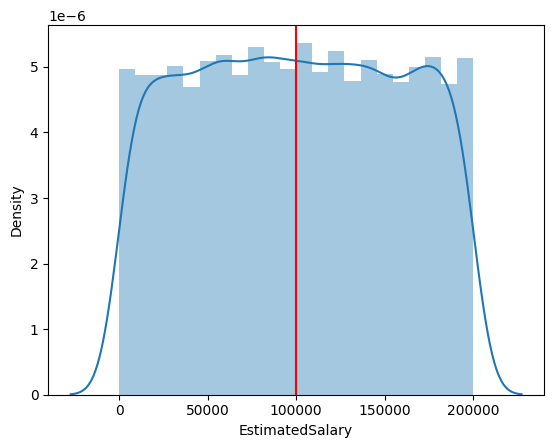

In [12]:
sns.distplot(data['EstimatedSalary'])
plt.axvline(mean_age,color='r')

In [13]:
data.shape

(10000, 14)


---

## `Samples as a whole`

## `500 samples of 20 each = 10000`

In [14]:
n=20
samples=[data.EstimatedSalary.sample(n) for i in range(500)]   # stratified sampling 20 * 500 = 10000

In [15]:
samples[:1]

[4992    173586.63
 5468    155492.87
 8925    164170.46
 7271    149697.78
 7773     66753.10
 8375     83844.79
 1778     68255.88
 3233     24802.77
 8415     80682.35
 3003    175750.21
 370      10598.29
 5662    122518.50
 8524    175310.38
 5340    136377.21
 6886      3218.71
 6563    148098.95
 1683    159808.95
 879      73418.29
 4977    148527.56
 3188     37898.50
 Name: EstimatedSalary, dtype: float64]

### `mean of samples`

In [16]:
np.mean(samples)

100207.60104200001

### `std of samples`

In [17]:
np.std(samples)

57306.411791222345

### `sample distribution`

Mean : 100207.60104200001
Std : 57306.411791222345


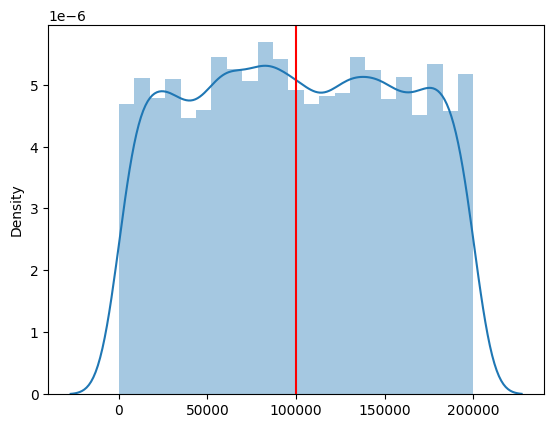

In [18]:
sns.distplot(samples)
plt.axvline(np.mean(samples),color='r')
print('Mean :',np.mean(samples))
print('Std :',np.std(samples))

# `---Proof of CLT---`

Size of each sample is : 30
For Sample Size: 2 
Confidence Interval is (94067.70750859777, 93503.87682473559) 
Mean=93785.79216666668 
Standard Error =143.83435812810757


Size of each sample is : 30
For Sample Size: 5 
Confidence Interval is (112990.26157141851, 91394.28696191478) 
Mean=102192.27426666665 
Standard Error =5509.177196301974


Size of each sample is : 30
For Sample Size: 10 
Confidence Interval is (112555.27424086376, 92260.65555913626) 
Mean=102407.9649 
Standard Error =5177.198643297831


Size of each sample is : 30
For Sample Size: 30 
Confidence Interval is (103270.91376193865, 96108.89417139468) 
Mean=99689.90396666666 
Standard Error =1827.045813914274


Size of each sample is : 30
For Sample Size: 100 
Confidence Interval is (102798.68914673186, 98455.83066660148) 
Mean=100627.25990666667 
Standard Error =1107.8720612577486


Size of each sample is : 30
For Sample Size: 300 
Confidence Interval is (102163.29215903145, 99847.22669874631) 
Mean=101005.25942888888 


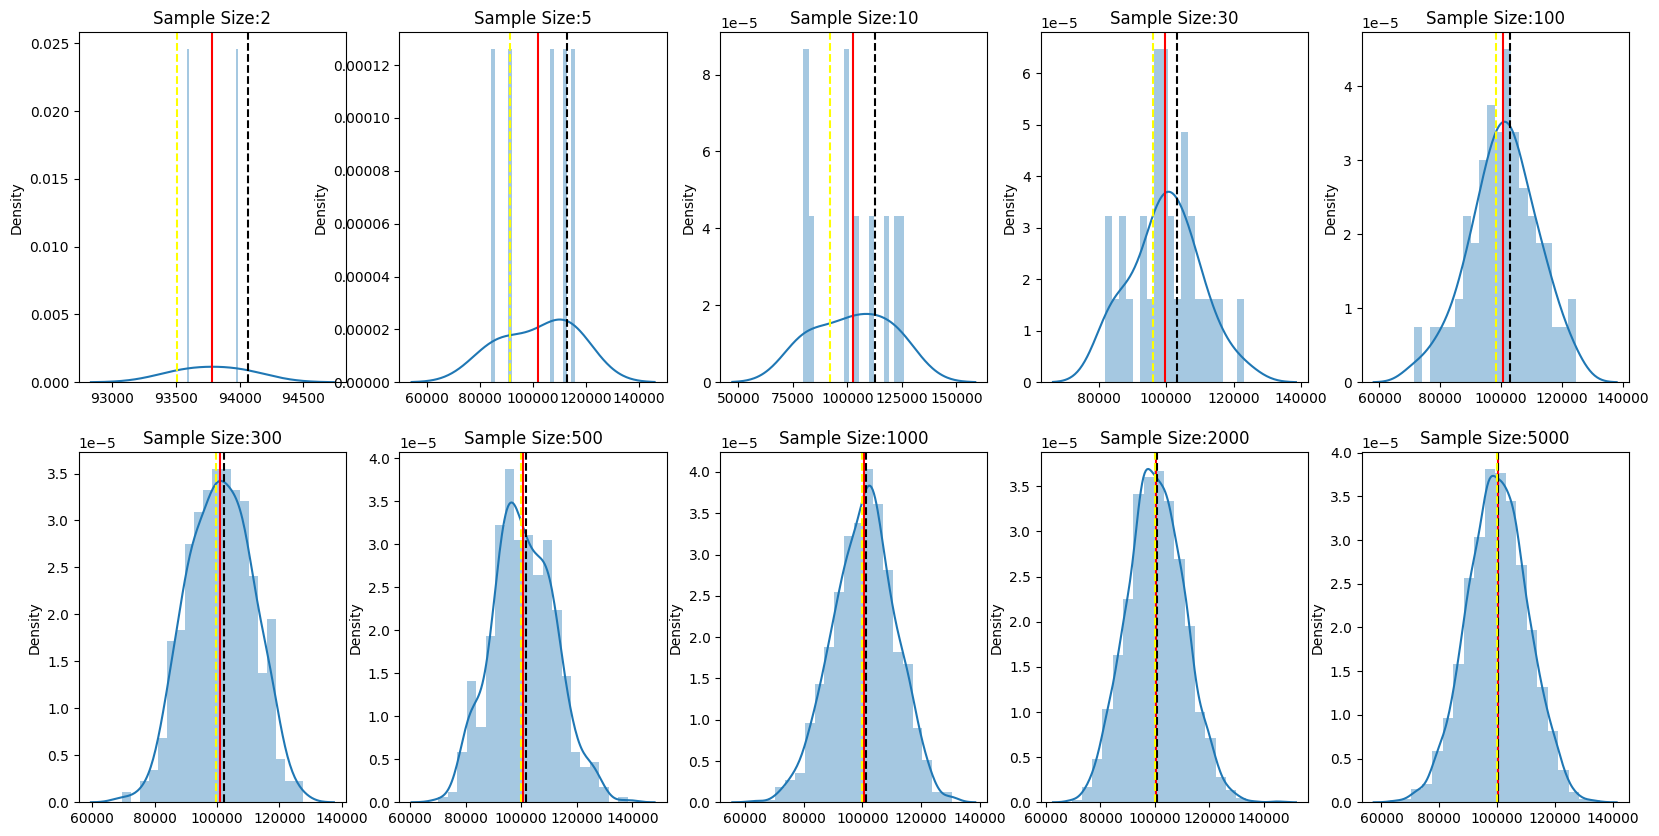

In [21]:
n=[2,5,10,30,100,300,500,1000,2000,5000]

cfi=[]
plt.figure(figsize=(20,10))
for index,sample_size in enumerate(n):
    sample_means=[data.EstimatedSalary.sample(30).mean() for i in range(sample_size)]
    print('Size of each sample is : 30')
    plt.subplot(2,5,index+1)   # for subplots
    sns.distplot(sample_means,bins=20)
    plt.axvline(np.mean(sample_means),color='r') # mean
    plt.axvline((np.mean(sample_means)+(1.96*(np.std(sample_means)/np.sqrt(sample_size)))),color='black',linestyle='dashed') # upper bound
    plt.axvline((np.mean(sample_means)-(1.96*(np.std(sample_means)/np.sqrt(sample_size)))),color='yellow',linestyle='dashed') # lower bound
    cfi=((np.mean(sample_means)+(1.96*(np.std(sample_means)/np.sqrt(sample_size))),(np.mean(sample_means)-(1.96*(np.std(sample_means)/np.sqrt(sample_size))))))
    plt.title('Sample Size:'+str(sample_size))
    print(f'For Sample Size: {sample_size} \nConfidence Interval is {cfi} \nMean={np.mean(sample_means)} \nStandard Error ={np.std(sample_means)/np.sqrt(sample_size)}\n\n')

## `As number of sample increases the Standard error decreases`

## `NOTE: We take std of sample in standard error`

# ---Thank you---